In [30]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pyautogui as pag
import time

In [31]:
with open("words.txt") as f:
    words = [line.strip() for line in f.readlines() if len(line.strip()) >= 4]
max_word_length = max(len(word) for word in words)
words_by_length = {i: [w for w in words if len(w) == i] for i in range(4, max_word_length + 1)}

In [32]:
grid = [
    ['s', 'i', 'b', 'a'],
    ['y', 's', 'r', 'h'],
    ['h', 't', 'c', 't'],
    ['p', 'o', 'r', 'a']
]
grid = np.array(grid)

In [33]:
grid_dict = {(x,y): grid[y, x] for y in range(grid.shape[0]) for x in range(grid.shape[1])}
grid_dict2 = {k:v for k,v in grid_dict.items() if v != ''}

In [34]:
def create_grid_with_diagonals(rows, cols):
    """
    Creates a 2D grid graph with both horizontal/vertical and diagonal connections.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.

    Returns:
        nx.Graph: A NetworkX graph representing the grid with diagonals.
    """
    G = nx.grid_2d_graph(rows, cols)

    # Add diagonal edges
    for r in range(rows):
        for c in range(cols):
            # Node (r, c)
            # Check for diagonal neighbors in all four directions
            # Top-left diagonal
            if r > 0 and c > 0:
                G.add_edge((r, c), (r - 1, c - 1))
            # Top-right diagonal
            if r > 0 and c < cols - 1:
                G.add_edge((r, c), (r - 1, c + 1))
            # Bottom-left diagonal
            if r < rows - 1 and c > 0:
                G.add_edge((r, c), (r + 1, c - 1))
            # Bottom-right diagonal
            if r < rows - 1 and c < cols - 1:
                G.add_edge((r, c), (r + 1, c + 1))
    return G

In [35]:
graph = create_grid_with_diagonals(*grid.shape)
for node in list(graph.nodes):
    x,y = node
    graph.nodes[node]['letter'] = grid[y, x]
    if grid[y,x] == '': 
        graph.remove_node(node)

In [36]:
graph.nodes[(0,0)]['letter']

np.str_('s')

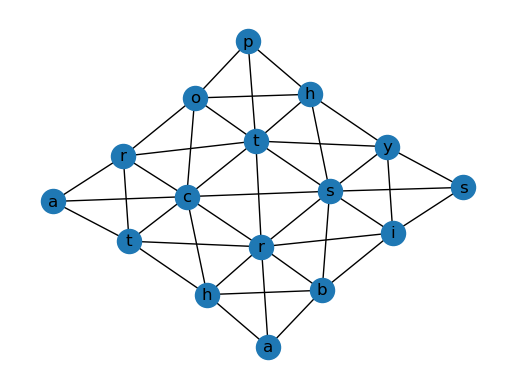

In [37]:
fig, ax = plt.subplots()
nx.draw(graph, labels=grid_dict2, ax=ax)

In [38]:
def determine_consistent_words(current_words_by_len, current_string):
    return {i: [w for w in current_words_by_len[i] if w.startswith(current_string)] for i in range(max(len(current_string), 4), max_word_length + 1)}

In [39]:
found_words = set()

def recursive_search(current_string, current_node, current_graph, consistent_words):
    #print(current_string, current_node, consistent_words.keys())
    if all(len(consistent_words[i]) == 0 for i in consistent_words.keys()):
        return
    for neighbor in current_graph.neighbors(current_node):
        next_string = current_string + graph.nodes[neighbor]['letter']
        if len(next_string) >= 4 and next_string in consistent_words[len(next_string)]:
            found_words.add(next_string)
        next_consistent_words = determine_consistent_words(consistent_words, next_string)
        new_graph = current_graph.copy()
        new_graph.remove_node(current_node)
        recursive_search(next_string, neighbor, new_graph, next_consistent_words)

In [40]:
for node in graph.nodes:
    starting_letter = graph.nodes[node]['letter']
    new_graph = graph.copy()
    new_graph.remove_node(node)
    recursive_search(starting_letter, node, graph, words_by_length)

In [41]:
len(found_words)

115

In [42]:
sorted_words = sorted(found_words, key=lambda s: (len(s), s))

In [43]:
time.sleep(2)
for word in sorted_words:
    pag.press('esc')
    pag.write(word)
    pag.press('enter')
    time.sleep(1)

KeyboardInterrupt: 